<div style = "font-family:Georgia;
              font-size:2.5vw;
              color:lightblue;
              font-style:bold;
              text-align:center;
              background:url('./Animations/Title Background.gif') no-repeat center;
              background-size:cover)">

<br><br>
Histograms of Oriented Gradients (HOG)
<br><br><br>

</div>

<h1 style = "text-align:left">Introduction</h1>

正如我们在ORB算法中看到的那样，我们可以使用图像中的关键点来进行基于关键点的匹配，以此来检测图像中的对象。如果你想检测具有许多不受背景影响的一致内部特征的对象，这些类型的算法就会非常有用。比如，这些算法适用于人脸检测，因为人脸具有许多不受图像背景影响的一致内部特征，例如眼睛、鼻子和嘴巴。然而，如果要尝试进行更一般的对象识别（例如，图像中的行人检测），这些类型的算法就不会那么有用了。原因是行人与人脸不同，没有与人脸一样的内部特征，毕竟每个行人的体形和走路风格都不同（见图1）。这意味着每个行人都有不同的内部特征，因此我们需要一些可以用于更一般地描述行人的方法。

<br>
<figure>
  <img src = "./Animations/pedestrians.jpeg" width = "100%" style = "border: thin silver solid; padding: 10px">
      <figcaption style = "text-align:left; font-style:italic">Fig. 1. - Pedestrians.</figcaption>
</figure> 
<br>

其中，有一种方法是尝试通过轮廓来检测行人。通过轮廓（边界）可以检测到图像中的对象，但这种方法非常具有难度，因为我们必须处理背景和前景之间的对比，而完成这一点是相当困难的。例如，假设你想要检测在白色建筑物前行走的图像中的行人，并且她穿着白色外套和黑色裤子（见图2）。我们可以在图2中看到，由于图像的背景大多是白色的，因此黑色裤子具有非常高的对比度，但是白色外套具有非常低的对比度。在这种情况下，非常容易就可以检测到裤子的边缘，但要检测外套的边缘，就会非常困难。在这个时候，就需要使用**HOG** 了。HOG代表**方向梯度直方图** ，它是由Navneet Dalal和Bill Triggs于2005年首次提出的。

<br>
<figure>
  <img src = "./Animations/woman.jpg" width = "100%" style = "border: thin silver solid; padding: 10px">
      <figcaption style = "text-align:left; font-style:italic">Fig. 2. - High and Low Contrast.</figcaption>
</figure> 
<br>

HOG算法的工作原理是通过创建图像中梯度方向分布的直方图，然后以非常特殊的方式对它们进行归一化。即使在对比度非常低的情况下，这种特殊的归一化也使得HOG在检测物体边缘方面非常有效。这些归一化的直方图会被放在一个特征向量中，称为HOG描述子。HOG可用于训练机器学习算法，如支持向量机（SVM），使其根据它们的边界（边缘）检测图像中的对象 。由于其巨大的成功和可靠性，HOG已成为用于对象检测的计算机视觉中最广泛使用的算法之一。


在这个notebook中，你将要学习的内容如下：

* HOG算法的工作原理
* 如何使用OpenCV创建HOG描述子
* 如何可视化HOG描述子。

# HOG算法

顾名思义，HOG算法是一种基于从图像梯度的方向创建直方图的算法。 HOG算法是通过一系列步骤实现的，具体如下：

1. 对于某个特定对象的图像，设置一个可以覆盖图像中整个对象的检测窗口或者你感兴趣的区域（参见图3）。

2. 计算检测窗口中每个像素的梯度的大小和方向。

3. 将检测窗口划分为连接的像素*单元格* ，其中，所有单元格的大小相同（参见图3）。该单元格的大小是一个自由参数，通常选择它的目的在于匹配想要检测的特征的范围。例如，在64×128像素检测窗口中，6至8像素宽的正方形单元格适合于检测人体肢体。

4. 为每个单元格创建直方图，首先将每个单元格中所有像素的渐变方向分组为特定数量的方向（角度）区间（bin）；然后将每个角度区间中梯度的梯度大小相加（见图3）。直方图中的区间数是一个自由参数，通常设置为9个角度区间。

5. 将相邻的单元格分组成*块*（见图3）。每个块中的单元格数是一个自由参数，所有块必须具有相同的大小。每个块之间的距离（称为步长）是一个自由参数，但通常设置为块大小的一半，在这种情况下，你将会获得重叠块（*请查看下面的视频*）。这样，HOG算法会根据经验更好地与重叠块一起运行。

6. 使用每个块中包含的单元格来归一化该块中的单元格直方图（参见图3）。如果你有重叠块，这说明大多数单元格将根据不同的块进行归一化（*请查看下面的视频*）。因此，相同的单元格可以具有几种不同的归一化。

7. 将所有块中的所有归一化直方图收集到称为HOG描述子的单个特征向量中。

8. 使用来自相同类型对象的大量图像的结果HOG描述子来训练机器学习算法（例如SVM），进而检测图像中那些类型的对象。 例如，你可以使用来自行人的大量图像的HOG描述子来训练SVM，进而检测图像中的行人。其中，训练是通过你想要在图像中检测到的对象的正反面示例完成的。

9. 训练完SVM之后，你需要使用滑动窗口方法来尝试检测和定位图像中的对象。 要想检测图像中的对象，你需要找到看起来类似于SVM所学习的HOG类型的图像部分。

<br>
<figure>
  <img src = "./Animations/HOG Diagram2.png" width = "100%" style = "border: thin silver solid; padding: 1px">
      <figcaption style = "text-align:left; font-style:italic">Fig. 3. - HOG Diagram.</figcaption>
</figure> 
<br>

<figure>
<video src = "./Animations/HOG Animation - Medium.mp4" width="100%" controls autoplay loop> </video>
<figcaption style = "text-align:left; font-style:italic">Vid. 1. - HOG Animation.</figcaption>
</figure> 

# 为什么HOG算法如此有效

如上所述，HOG通过在称为*单元格*的图像的局部部分中添加特定方向的梯度的大小来创建直方图。这样做，我们保证了更强的梯度会对其各自的角度区间的大小产生更多影响，同时由噪声导致的较弱与随机定向梯度的影响被最小化。总之，直方图会以这种方式告诉我们每个单元格的主导梯度方向。


### 处理对比 

现在，由于局部照明的变化以及背景和前景之间的对比度，主导方向的梯度差异会非常大。

为了弄清楚背景与前景对比度差异，HOG算法尝试在本地检测边缘。为了做到这一点，它定义了一组称为**块**的单元格，并使用这个本地单元格组对该直方图进行归一化。通过局部归一化，HOG算法可以非常可靠地检测每个块中的边缘。这就叫做**块归一化**。

除了使用块归一化之外，HOG算法还使用重叠块来提高其性能。通过使用重叠块，每个单元格向最终HOG描述子贡献若干独立分量，其中每个分量对应于相对于不同块归一化的单元格。这似乎是多余的，但是，经验证明，通过相对于不同的本地块对每个单元格进行几次归一化，HOG算法的性能会显著提高。

### 加载图像并导入资源

要创建HOG描述子，第一步是将所需的包加载到Python中并加载图像。

我们首先使用OpenCV加载三角形图块的图像。因为，`cv2.imread()`函数会将图像加载为BGR，而我们需要将图像转换为RGB，这样我们就可以使用正确的颜色显示它。与之前一样，我们会将BGR图像转换为灰度图像进行分析。

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Set the default figure size
plt.rcParams['figure.figsize'] = [17.0, 7.0]

# Load the image 
image = cv2.imread('./images/triangle_tile.jpeg')

# Convert the original image to RGB
original_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the original image to gray scale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Print the shape of the original and gray scale images
print('The original image has shape: ', original_image.shape)
print('The gray scale image has shape: ', gray_image.shape)

# Display the images
plt.subplot(121)
plt.imshow(original_image)
plt.title('Original Image')
plt.subplot(122)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Scale Image')
plt.show()

The original image has shape:  (250, 250, 3)
The gray scale image has shape:  (250, 250)


# 创建HOG描述子

我们将使用OpenCV的`HOGDescriptor`类来创建HOG描述子， 使用`HOGDescriptor()`函数设置HOG描述子的参数。`HOGDescriptor()`函数的参数及其默认值如下：

`cv2.HOGDescriptor(win_size = (64, 128),  
                  block_size = (16, 16),  
                  block_stride = (8, 8),  
                  cell_size = (8, 8),  
                  nbins = 9,  
                  win_sigma = DEFAULT_WIN_SIGMA,  
                  threshold_L2hys = 0.2,  
                  gamma_correction = true,  
                  nlevels = DEFAULT_NLEVELS)`

参数：

* **win_size** – *Size*  
  检测窗口的大小（以像素为单位）（*高度，宽度*）。定义一个感兴趣的区域。它必须是单元格尺寸的整数倍。


* **block_size** – *Size*  
  块大小（以像素为单位）（*宽度，高度*）。定义每个块中有多少个单元格。它必须是单元格尺寸的整数倍，并且必须小于检测窗口。块越小，你将获得的细节越详细。


* **block_stride** – *Size*  
  以像素为单位块步长（*水平，垂直*）。它必须是单元格尺寸的整数倍。 `block_stride`定义了相邻块之间的距离，例如，水平8个像素和垂直8个像素。`block_stride`越长，算法就会运行得越快（因为评估的块会越少），但算法也可能不再运行。


* **cell_size** – *Size*  
  单元格大小，以像素为单位（*宽度，高度*）。确定格单元的大小。单元格越小，你将获得的细节越详细。


* **nbins** – *int*  
  直方图的区间数。确定用于制作直方图的角度区间数量。使用的区间越多，就可以获取更多的渐变方向。 HOG使用无符号渐变，因此角度区间的值将介于0和180度之间。


* **win_sigma** – *double*  
  高斯平滑窗口参数。通过在计算直方图之前对每个像素应用高斯空间窗口来平滑块边缘附近的像素，从而改善HOG算法的性能。


* **threshold_L2hys** – *double*  
   L2-Hys（Lowe式限幅L2范数）归一化方法收缩率。 L2-Hys方法用于归一化块，它由L2范数和剪切以及重归一化组成。限幅会将每个块的描述子向量的最大值限制为具有给定阈值的值（默认为0.2）。限幅之后，如*IJCV*，60（2）：91-110,2004中所述，重新归一化描述子矢量。


* **gamma_correction** – *bool*  
  用于指定是否需要伽马校正预处理的标志。执行伽马校正可以在一定程度上提高HOG算法的性能。


* **nlevels** – *int*  
  检测窗口增加的最大数量。

我们可以看到，`cv2.HOGDescriptor()`函数支持各种参数。前几个参数（`block_size, block_stride, cell_size`以及`nbins`）是最有可能更改的参数。其他参数都可以放心地保留其默认值，这样你会获得很不错的结果。

在下面的代码中，我们将使用 `cv2.HOGDescriptor()`函数来设置单元格大小、块大小、块步长以及HOG描述子的直方图区间数。然后，我们将使用`.compute(image)`方法计算给定`image`的HOG描述子（特征向量）。

In [2]:
# Specify the parameters for our HOG descriptor

# Cell Size in pixels (width, height). Must be smaller than the size of the detection window
# and must be chosen so that the resulting Block Size is smaller than the detection window.
cell_size = (6, 6)

# Number of cells per block in each direction (x, y). Must be chosen so that the resulting
# Block Size is smaller than the detection window
num_cells_per_block = (2, 2)

# Block Size in pixels (width, height). Must be an integer multiple of Cell Size.
# The Block Size must be smaller than the detection window
block_size = (num_cells_per_block[0] * cell_size[0],
              num_cells_per_block[1] * cell_size[1])

# Calculate the number of cells that fit in our image in the x and y directions
x_cells = gray_image.shape[1] // cell_size[0]
y_cells = gray_image.shape[0] // cell_size[1]

# Horizontal distance between blocks in units of Cell Size. Must be an integer and it must
# be set such that (x_cells - num_cells_per_block[0]) / h_stride = integer.
h_stride = 1

# Vertical distance between blocks in units of Cell Size. Must be an integer and it must
# be set such that (y_cells - num_cells_per_block[1]) / v_stride = integer.
v_stride = 1

# Block Stride in pixels (horizantal, vertical). Must be an integer multiple of Cell Size
block_stride = (cell_size[0] * h_stride, cell_size[1] * v_stride)

# Number of gradient orientation bins
num_bins = 9        


# Specify the size of the detection window (Region of Interest) in pixels (width, height).
# It must be an integer multiple of Cell Size and it must cover the entire image. Because
# the detection window must be an integer multiple of cell size, depending on the size of
# your cells, the resulting detection window might be slightly smaller than the image.
# This is perfectly ok.
win_size = (x_cells * cell_size[0] , y_cells * cell_size[1])

# Print the shape of the gray scale image for reference
print('\nThe gray scale image has shape: ', gray_image.shape)
print()

# Print the parameters of our HOG descriptor
print('HOG Descriptor Parameters:\n')
print('Window Size:', win_size)
print('Cell Size:', cell_size)
print('Block Size:', block_size)
print('Block Stride:', block_stride)
print('Number of Bins:', num_bins)
print()

# Set the parameters of the HOG descriptor using the variables defined above
hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, num_bins)

# Compute the HOG Descriptor for the gray scale image
hog_descriptor = hog.compute(gray_image)


The gray scale image has shape:  (250, 250)

HOG Descriptor Parameters:

Window Size: (246, 246)
Cell Size: (6, 6)
Block Size: (12, 12)
Block Stride: (6, 6)
Number of Bins: 9



#  HOG描述子中的元素数量

由此得到的HOG描述子（特征向量）包含来自在一个长向量中连接的检测窗口中的所有块的所有单元格的归一化直方图。因此，HOG特征向量的大小将由检测窗口中的块总数乘以每个块的单元格数乘以定向区间的数量来得出，公式如下：

<span class="mathquill">
\begin{equation}
\mbox{total_elements} = (\mbox{total_number_of_blocks})\mbox{ } \times \mbox{ } (\mbox{number_cells_per_block})\mbox{ } \times \mbox{ } (\mbox{number_of_bins})
\end{equation}
</span>

如果没有重叠块（*即* ` block_stride`等于`block_size`），则可以通过将检测窗口的大小除以块大小来计算块的总数。但是，在一般情况下，必须考虑到我们有重叠块的事实。要想知道一般情况下的块总数（*即* 对于任何`block_stride`和`block_size`），可以使用下面给出的公式：

<span class="mathquill">
\begin{equation}
\mbox{Total}_i = \left( \frac{\mbox{block_size}_i}{\mbox{block_stride}_i} \right)\left( \frac{\mbox{window_size}_i}{\mbox{block_size}_i} \right) - \left [\left( \frac{\mbox{block_size}_i}{\mbox{block_stride}_i} \right) - 1 \right]; \mbox{  for  } i = x,y
\end{equation}
</span>

其中，<span class =“mathquill”> Total$_x$ </span>，是沿检测窗口宽度的块总数，<span class =“mathquill”> Total$_y$</span>，是沿着检测窗口高度的块总数。这个 <span class =“mathquill”> Total$_x$ </span>和<span class =“mathquill”> Total$_y$</span>公式考虑了重叠产生的额外块。在计算<span class =“mathquill”> Total$_x$ </span>和<span class =“mathquill”> Total$_y$</span>之后，我们可以通过<span class =“mathquill“> Total$_x$ 乘以 Total$_y$</span>来获取检测窗口中的块总数。其实，上述公式可以进行相当大的简化，因为`block_size`，`block_stride`和`window_size`都是根据`cell_size`定义的。通过进行适当的替换和删除，上述公式简化为：

<span class="mathquill">
\begin{equation}
\mbox{Total}_i = \left(\frac{\mbox{cells}_i - \mbox{num_cells_per_block}_i}{N_i}\right) + 1\mbox{  }; \mbox{  for  } i = x,y
\end{equation}
</span>

其中，<span class =“mathquill”> cells$_x$</span>是沿检测窗口宽度的单元格总数，<span class =“mathquill”> cells$_y$</span>，是沿检测窗口高度的单元格总数。 <span class =“mathquill”> $N_x$</span>是以`cell_size`为单位的水平块步长，<span class =“mathquill”>$N_y$</span>是以cell_size`cell_size`为单位的垂直块步长。

接下来，让我们计算一下HOG特征向量的元素数量应该是多少，并检查它是否与上面计算的HOG描述子的形状相匹配。

In [3]:
# Calculate the total number of blocks along the width of the detection window
tot_bx = np.uint32(((x_cells - num_cells_per_block[0]) / h_stride) + 1)

# Calculate the total number of blocks along the height of the detection window
tot_by = np.uint32(((y_cells - num_cells_per_block[1]) / v_stride) + 1)

# Calculate the total number of elements in the feature vector
tot_els = (tot_bx) * (tot_by) * num_cells_per_block[0] * num_cells_per_block[1] * num_bins

# Print the total number of elements the HOG feature vector should have
print('\nThe total number of elements in the HOG Feature Vector should be: ',
      tot_bx, 'x',
      tot_by, 'x',
      num_cells_per_block[0], 'x',
      num_cells_per_block[1], 'x',
      num_bins, '=',
      tot_els)

# Print the shape of the HOG Descriptor to see that it matches the above
print('\nThe HOG Descriptor has shape:', hog_descriptor.shape)
print()


The total number of elements in the HOG Feature Vector should be:  40 x 40 x 2 x 2 x 9 = 57600

The HOG Descriptor has shape: (57600, 1)



# 可视化HOG描述子

我们可以通过将与每个单元格相关联的直方图绘制为矢量集合来可视化HOG描述子。为此，我们将直方图中的每个区间绘制为单个向量，其大小由区间的高度而定，其方向由与其关联的角度区间而定。由于任何给定的单元格，可能有多个与之关联的直方图。由于重叠块的存在，我们将选择平均分配每个单元格的所有直方图，这样便于为每个单元格生成单个直方图。

要可视化HOG描述子，OpenCV没有简单的方法可用，因此我们必须先进行一些操作才能使其可视化。这要从改变HOG描述子开始，这样可以使我们的计算更容易。然后，我们将计算每个单元格的平均直方图，最后我们将直方图区间转换为矢量。只要有了矢量，就可以为图像中的每个单元格绘制相应的矢量图。

下面的代码会生成一个交互式图，你可以与之进行交互。该图包含：
* 灰度图像，
* HOG描述子（特征向量），
* HOG描述子的放大部分，
* 所选单元格的直方图。

**你可以通过灰度图像或HOG描述子图像上的任意位置来选择特定单元格。** 单击任一图像后，将出现一个*洋红色*矩形，它会显示你选择的单元。缩放窗口将显示所选单元格周围的HOG描述子的一个放大版本，而直方图将显示所选单元格的相应直方图。交互式窗口底部还有按钮，你可以选择其他功能，例如平移，并根据需要提供了保存图形的选项。点击Home按钮，会将图形返回到其默认值。

**注意**: 如果你在优达学城工作区中运行此notebook，则交互式图大约会有2秒的延迟。这就是说，如果单击图像进行放大，则交互图的刷新将需要大约2秒钟。

The feature vector has shape: (57600, 1)
The reshaped feature vector has shape: (40, 40, 2, 2, 9)
The average gradient array has shape:  (41, 41, 9)


<IPython.core.display.Javascript object>


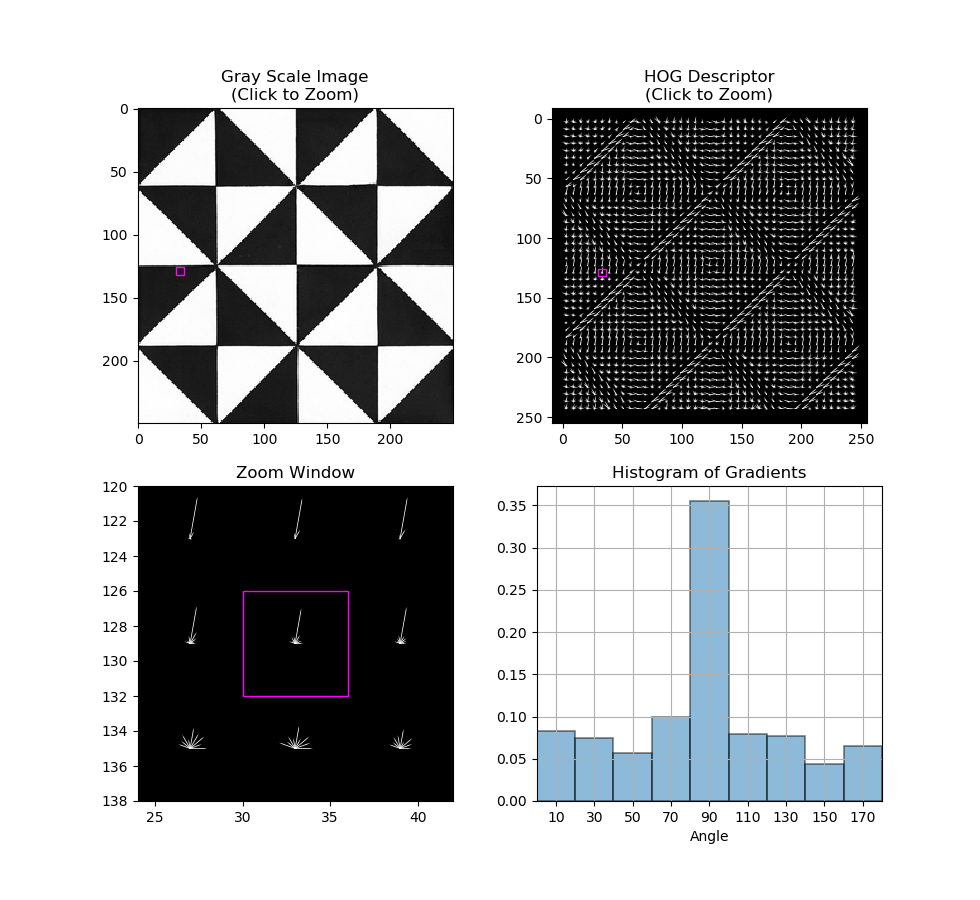

In [4]:
%matplotlib notebook

import copy
import matplotlib.patches as patches

# Set the default figure size
plt.rcParams['figure.figsize'] = [9.8, 9]

# Reshape the feature vector to [blocks_y, blocks_x, num_cells_per_block_x, num_cells_per_block_y, num_bins].
# The blocks_x and blocks_y will be transposed so that the first index (blocks_y) referes to the row number
# and the second index to the column number. This will be useful later when we plot the feature vector, so
# that the feature vector indexing matches the image indexing.
hog_descriptor_reshaped = hog_descriptor.reshape(tot_bx,
                                                 tot_by,
                                                 num_cells_per_block[0],
                                                 num_cells_per_block[1],
                                                 num_bins).transpose((1, 0, 2, 3, 4))

# Print the shape of the feature vector for reference
print('The feature vector has shape:', hog_descriptor.shape)

# Print the reshaped feature vector
print('The reshaped feature vector has shape:', hog_descriptor_reshaped.shape)

# Create an array that will hold the average gradients for each cell
ave_grad = np.zeros((y_cells, x_cells, num_bins))

# Print the shape of the ave_grad array for reference
print('The average gradient array has shape: ', ave_grad.shape) 

# Create an array that will count the number of histograms per cell
hist_counter = np.zeros((y_cells, x_cells, 1))

# Add up all the histograms for each cell and count the number of histograms per cell
for i in range (num_cells_per_block[0]):
    for j in range(num_cells_per_block[1]):
        ave_grad[i:tot_by + i,
                 j:tot_bx + j] += hog_descriptor_reshaped[:, :, i, j, :]
        
        hist_counter[i:tot_by + i,
                     j:tot_bx + j] += 1

# Calculate the average gradient for each cell
ave_grad /= hist_counter
   
# Calculate the total number of vectors we have in all the cells.
len_vecs = ave_grad.shape[0] * ave_grad.shape[1] * ave_grad.shape[2]

# Create an array that has num_bins equally spaced between 0 and 180 degress in radians.
deg = np.linspace(0, np.pi, num_bins, endpoint = False)

# Each cell will have a histogram with num_bins. For each cell, plot each bin as a vector (with its magnitude
# equal to the height of the bin in the histogram, and its angle corresponding to the bin in the histogram). 
# To do this, create rank 1 arrays that will hold the (x,y)-coordinate of all the vectors in all the cells in the
# image. Also, create the rank 1 arrays that will hold all the (U,V)-components of all the vectors in all the
# cells in the image. Create the arrays that will hold all the vector positons and components.
U = np.zeros((len_vecs))
V = np.zeros((len_vecs))
X = np.zeros((len_vecs))
Y = np.zeros((len_vecs))

# Set the counter to zero
counter = 0

# Use the cosine and sine functions to calculate the vector components (U,V) from their maginitudes. Remember the 
# cosine and sine functions take angles in radians. Calculate the vector positions and magnitudes from the
# average gradient array
for i in range(ave_grad.shape[0]):
    for j in range(ave_grad.shape[1]):
        for k in range(ave_grad.shape[2]):
            U[counter] = ave_grad[i,j,k] * np.cos(deg[k])
            V[counter] = ave_grad[i,j,k] * np.sin(deg[k])
        
            X[counter] = (cell_size[0] / 2) + (cell_size[0] * i)
            Y[counter] = (cell_size[1] / 2) + (cell_size[1] * j)
        
            counter = counter + 1

# Create the bins in degress to plot our histogram. 
angle_axis = np.linspace(0, 180, num_bins, endpoint = False)
angle_axis += ((angle_axis[1] - angle_axis[0]) / 2)

# Create a figure with 4 subplots arranged in 2 x 2
fig, ((a,b),(c,d)) = plt.subplots(2,2)

# Set the title of each subplot
a.set(title = 'Gray Scale Image\n(Click to Zoom)')
b.set(title = 'HOG Descriptor\n(Click to Zoom)')
c.set(title = 'Zoom Window', xlim = (0, 18), ylim = (0, 18), autoscale_on = False)
d.set(title = 'Histogram of Gradients')

# Plot the gray scale image
a.imshow(gray_image, cmap = 'gray')
a.set_aspect(aspect = 1)

# Plot the feature vector (HOG Descriptor)
b.quiver(Y, X, U, V, color = 'white', headwidth = 0, headlength = 0, scale_units = 'inches', scale = 5)
b.invert_yaxis()
b.set_aspect(aspect = 1)
b.set_facecolor('black')

# Define function for interactive zoom
def onpress(event):
    
    #Unless the left mouse button is pressed do nothing
    if event.button != 1:
        return
    
    # Only accept clicks for subplots a and b
    if event.inaxes in [a, b]:
        
        # Get mouse click coordinates
        x, y = event.xdata, event.ydata
        
        # Select the cell closest to the mouse click coordinates
        cell_num_x = np.uint32(x / cell_size[0])
        cell_num_y = np.uint32(y / cell_size[1])
        
        # Set the edge coordinates of the rectangle patch
        edgex = x - (x % cell_size[0])
        edgey = y - (y % cell_size[1])
        
        # Create a rectangle patch that matches the the cell selected above        
        rect = patches.Rectangle((edgex, edgey),
                                  cell_size[0], cell_size[1],
                                  linewidth = 1,
                                  edgecolor = 'magenta',
                                  facecolor='none')
        
        # A single patch can only be used in a single plot. Create copies
        # of the patch to use in the other subplots
        rect2 = copy.copy(rect)
        rect3 = copy.copy(rect)
        
        # Update all subplots
        a.clear()
        a.set(title = 'Gray Scale Image\n(Click to Zoom)')
        a.imshow(gray_image, cmap = 'gray')
        a.set_aspect(aspect = 1)
        a.add_patch(rect)

        b.clear()
        b.set(title = 'HOG Descriptor\n(Click to Zoom)')
        b.quiver(Y, X, U, V, color = 'white', headwidth = 0, headlength = 0, scale_units = 'inches', scale = 5)
        b.invert_yaxis()
        b.set_aspect(aspect = 1)
        b.set_facecolor('black')
        b.add_patch(rect2)

        c.clear()
        c.set(title = 'Zoom Window')
        c.quiver(Y, X, U, V, color = 'white', headwidth = 0, headlength = 0, scale_units = 'inches', scale = 1)
        c.set_xlim(edgex - cell_size[0], edgex + (2 * cell_size[0]))
        c.set_ylim(edgey - cell_size[1], edgey + (2 * cell_size[1]))
        c.invert_yaxis()
        c.set_aspect(aspect = 1)
        c.set_facecolor('black')
        c.add_patch(rect3)

        d.clear()
        d.set(title = 'Histogram of Gradients')
        d.grid()
        d.set_xlim(0, 180)
        d.set_xticks(angle_axis)
        d.set_xlabel('Angle')
        d.bar(angle_axis,
              ave_grad[cell_num_y, cell_num_x, :],
              180 // num_bins,
              align = 'center',
              alpha = 0.5,
              linewidth = 1.2,
              edgecolor = 'k')

        fig.canvas.draw()

# Create a connection between the figure and the mouse click
fig.canvas.mpl_connect('button_press_event', onpress)
plt.show()

# 了解直方图

下面，让我们看一下上图的几个快照，看看所选单元格的直方图是否有意义。首先，看一个在三角形内部而不是边缘附近的一个单元格：

<br>
<figure>
  <img src = "./Animations/snapshot1.png" width = "70%" style = "border: thin silver solid; padding: 1px">
      <figcaption style = "text-align:center; font-style:italic">Fig. 4. - Histograms Inside a Triangle.</figcaption>
</figure> 
<br>

在这个示例中，由于三角形几乎都是相同的颜色，因此在所选单元格中不应存在任何主导梯度。我们在缩放窗口和直方图中也可以清楚地看到，情况确实如此。梯度有很多，但没有一个在另一个上占明显的主导地位。

现在，让我们看一下靠近水平边缘的一个单元格：

<br>
<figure>
  <img src = "./Animations/snapshot2.png" width = "70%" style = "border: thin silver solid; padding: 1px">
      <figcaption style = "text-align:center; font-style:italic">Fig. 5. - Histograms Near a Horizontal Edge.</figcaption>
</figure> 
<br>

请牢记，边缘是图像中强度变化很突然的一个区域。在这些区域，我们将在某个特定方向上具有高强度梯度。这正是我们在所选单元格的相应直方图和缩放窗口中看到的内容。在缩放窗口中，我们可以看到主导梯度呈几乎90度的向上趋势，因为这是强度急剧变化的方向。因此，我们应该期望直方图中的90度区域比其他区域更强。实际上，这就是我们所看到的。

接下来，让我们看一下靠近垂直边缘的一个单元格：

<br>
<figure>
  <img src = "./Animations/snapshot3.png" width = "70%" style = "border: thin silver solid; padding: 1px">
      <figcaption style = "text-align:center; font-style:italic">Fig. 6. - Histograms Near a Vertical Edge.</figcaption>
</figure> 
<br>

在这个示例中，我们希望该单元格中的主导梯度是水平的，接近180度，因为这是强度急剧变化的方向。因此，我们应该期望直方图中的170度区域会强烈支配其他区域。实际上，这就是我们在直方图中看到的，但我们也看到该单元格中还有另一个显性梯度，即10度区间中的梯度。原因在于HOG算法使用无符号梯度，这意味着0度和180度被认为是相同的。因此，当创建直方图时，160度和180度之间的角度与10度区间和170度区间成比例。这就会导致在垂直边缘附近的单元格中，存在两个主导梯度，而不是只有一个。

最后，让我们看一下靠近对角线边缘的一个单元格。

<br>
<figure>
  <img src = "./Animations/snapshot4.png" width = "70%" style = "border: thin silver solid; padding: 1px">
      <figcaption style = "text-align:center; font-style:italic">Fig. 7. - Histograms Near a Diagonal Edge.</figcaption>
</figure> 
<br>

要理解我们所看到的东西，首先，我们要知道，梯度有一个x分量和一个y分量，就像矢量一样。因此，一个梯度的最终方向将由其分量的矢量和而定。出于这个原因，在垂直边缘上，梯度都是水平的，因为它们只有一个x分量，如图4所示。而在水平边缘上，梯度都是垂直的，因为它们只有一个y分量，如图3所示。因此，在对角线边缘，梯度将会是对角线，因为x和y分量都是非零。由于图像中的对角线边缘接近45度，我们应该期望在50度区间中看到一个主导的梯度方向。实际上，这就是我们在直方图中看到的，但是，如图4所示，我们看到有两个主导梯度而不是一个。其原因在于，创建直方图时，靠近区间边缘的角度成比例地给相邻区间提供贡献。例如，角度为40度的梯度位于30度和50度区间的中间。因此，梯度的大小被均匀地分成30度和50度的区间。这就会导致在对角线边缘附近的单元中，存在两个主导梯度，而不是只有一个。

现在你已经了解了HOG的实现方式，接下来，在工作区中找到名为*Examples*的notebook。你可以在那里为各种图像的HOG描述子设置自己的参数。祝你学得开心哦！